<a href="https://colab.research.google.com/github/alangaurav/DAV15714/blob/master/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Regression modelling
 - There are primarily four types of time series models that exist.
    1. MA - stationary
    2. AR - stationary
    3. ARMA - stationary
    4. ARIMA - non stationary

## Standard Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import acf, graphics, pacf, VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import seaborn as sns

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

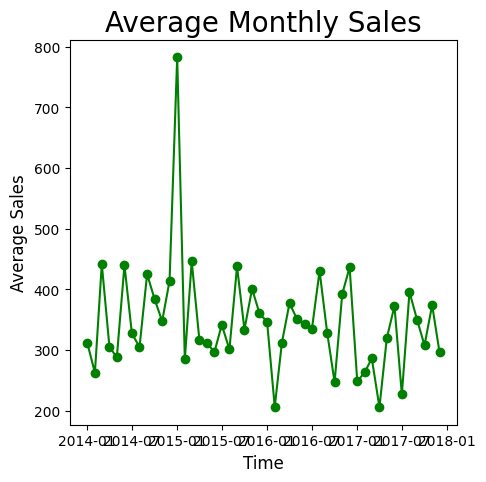

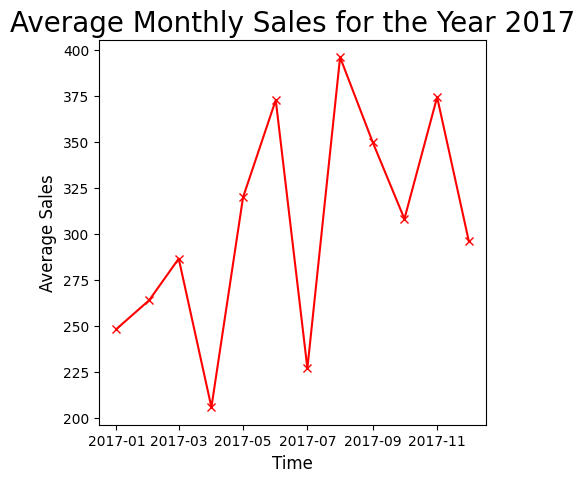

<Figure size 500x500 with 0 Axes>

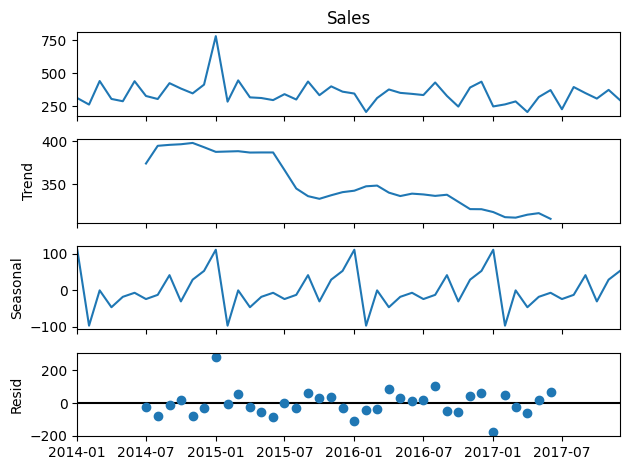

In [2]:
# Time series analysis
# Problem: Convert data into sales series data and plot trends using monthly mean average
data = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Four/data/Superstore.xls')
print(data.head())
print(data.info())

furniture = data[data['Category'] == 'Furniture']

# Clean furniture data
furniture.isnull().sum()

# Index TSA by order date
furniture = furniture.set_index('Order Date')
print(furniture.head())

month_average = furniture['Sales'].resample('MS').mean()
print(month_average.head())

#Plot the Furniture Sales Time Series Data for all the years
plt.figure(figsize=(5,5))
plt.plot(month_average, color='green', marker='o')
plt.title("Average Monthly Sales", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Sales", fontsize = 12)
plt.show()

# #Plot the Furniture Sales Time Series Data for only 2017
plt.figure(figsize=(5,5))
plt.plot(month_average['2017':], color='red', marker='x')
plt.title("Average Monthly Sales for the Year 2017", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Sales", fontsize = 12)
plt.show()

#Plot the Furniture Sales Time Series Data for all the years
plt.figure(figsize=(5,5))
decomposition = sm.tsa.seasonal_decompose(month_average, model='additive')
fig = decomposition.plot()
plt.show()

                         0                    1                    2  \
date   1959-01-01 00:00:00  1959-04-01 00:00:00  1959-07-01 00:00:00   
rgnp                1606.4               1637.0               1629.5   
pgnp                1608.3               1622.2               1636.2   
ulc                   47.5                 47.5                 48.7   
gdfco                 36.9                 37.4                 37.6   
gdf                   37.4                 37.5                 37.6   
gdfim                 26.9                 27.0                 27.1   
gdfcf                 32.3                 32.2                 32.4   
gdfce                 23.1                 23.4                 23.4   

                         3                    4  
date   1959-10-01 00:00:00  1960-01-01 00:00:00  
rgnp                1643.4               1671.6  
pgnp                1650.3               1664.6  
ulc                   48.8                 49.1  
gdfco                 37.7   

<Axes: xlabel='date', ylabel='gdfce'>

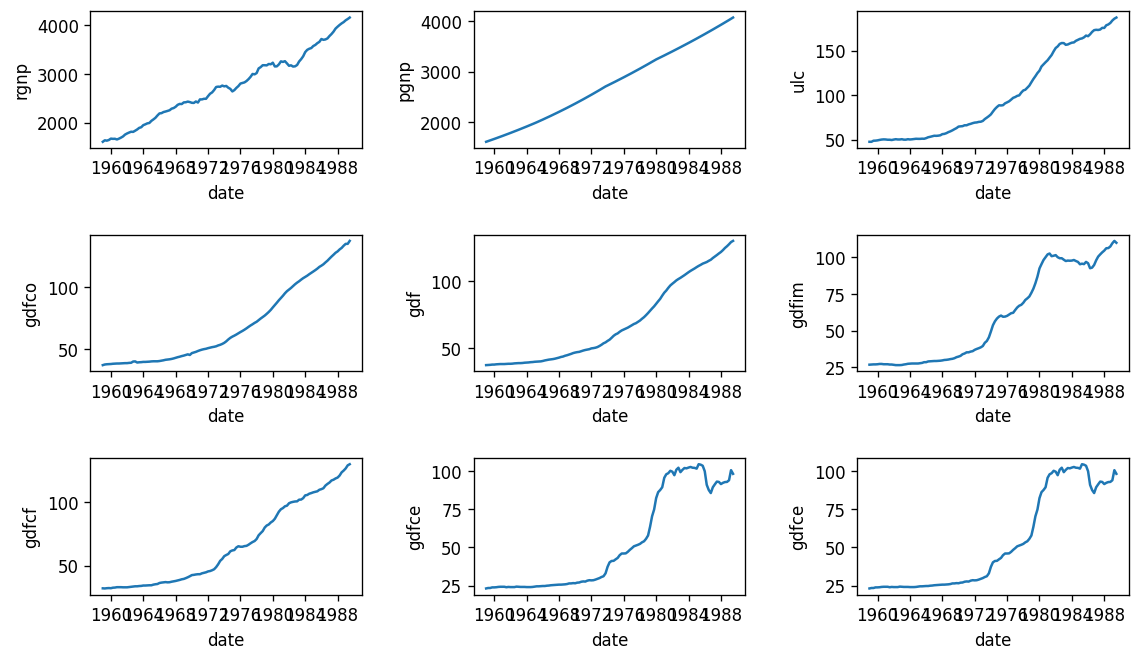

In [3]:
# Model visualisation
data = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Four/data/wage_growth.txt', sep=',', parse_dates=['date'])
print(data.head().T)
print(data.info())

# Visualise the data
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
fig.tight_layout(pad = 3.0)
# Convert to a decent for loop
sns.lineplot(data=data, x="date", y="rgnp", ax = axes[0,0])
sns.lineplot(data=data, x="date", y="pgnp", ax = axes[0,1])
sns.lineplot(data=data, x="date", y="ulc",  ax = axes[0,2])
sns.lineplot(data=data, x="date", y="gdfco",ax = axes[1,0])
sns.lineplot(data=data, x="date", y="gdf",  ax = axes[1,1])
sns.lineplot(data=data, x="date", y="gdfim",ax = axes[1,2])
sns.lineplot(data=data, x="date", y="gdfcf",ax = axes[2,0])
sns.lineplot(data=data, x="date", y="gdfce",ax = axes[2,1])
sns.lineplot(data=data, x="date", y="gdfce",ax = axes[2,2])

<ipython-input-4-71ca96158032>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Four/data/SW2001_Data.xlsx', parse_dates=['obs'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164 entries, 1960-01-01 to 2000-10-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   obs           164 non-null    datetime64[ns]
 1   Inflation     164 non-null    float64       
 2   Unemployment  164 non-null    float64       
 3   Fed Funds     164 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.4 KB


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


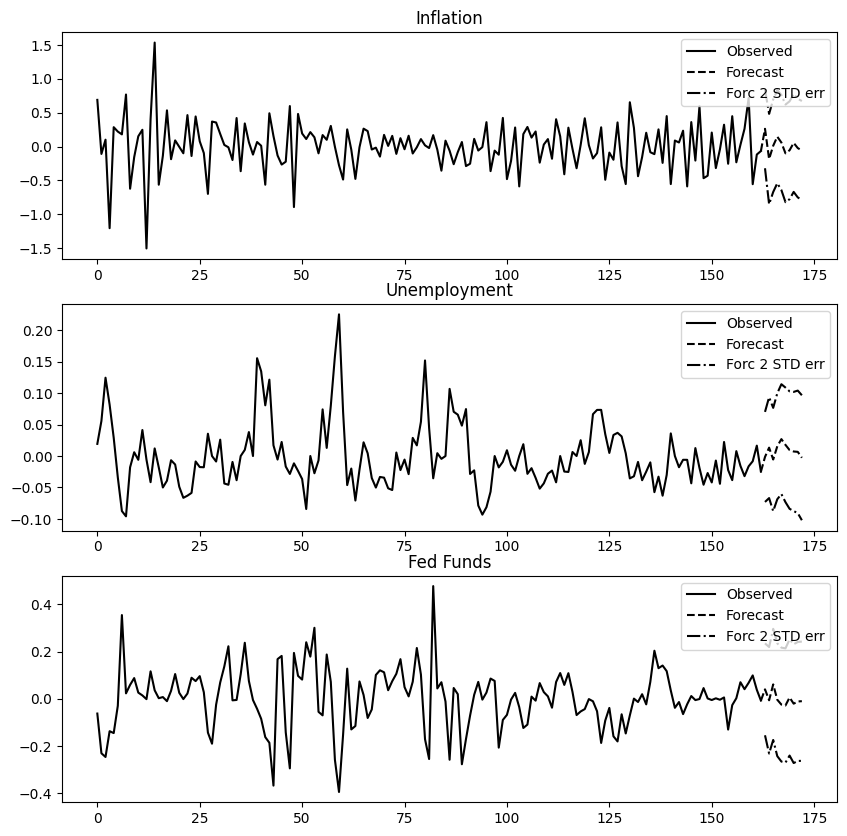

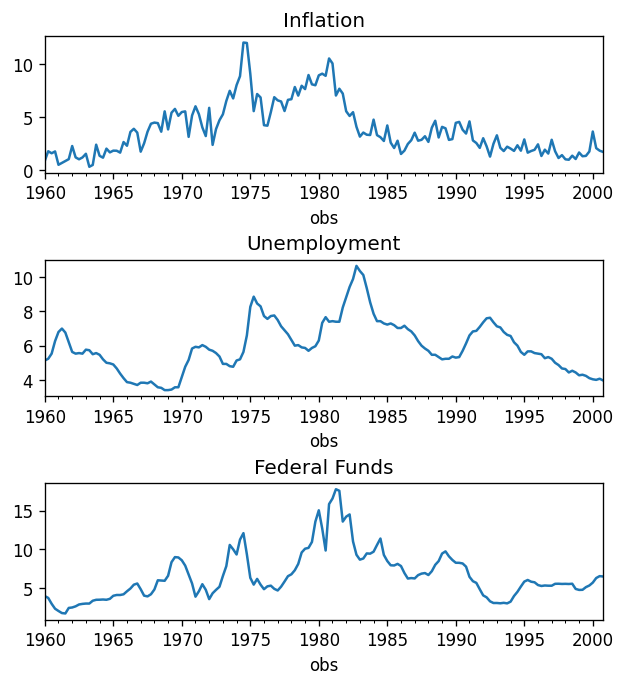

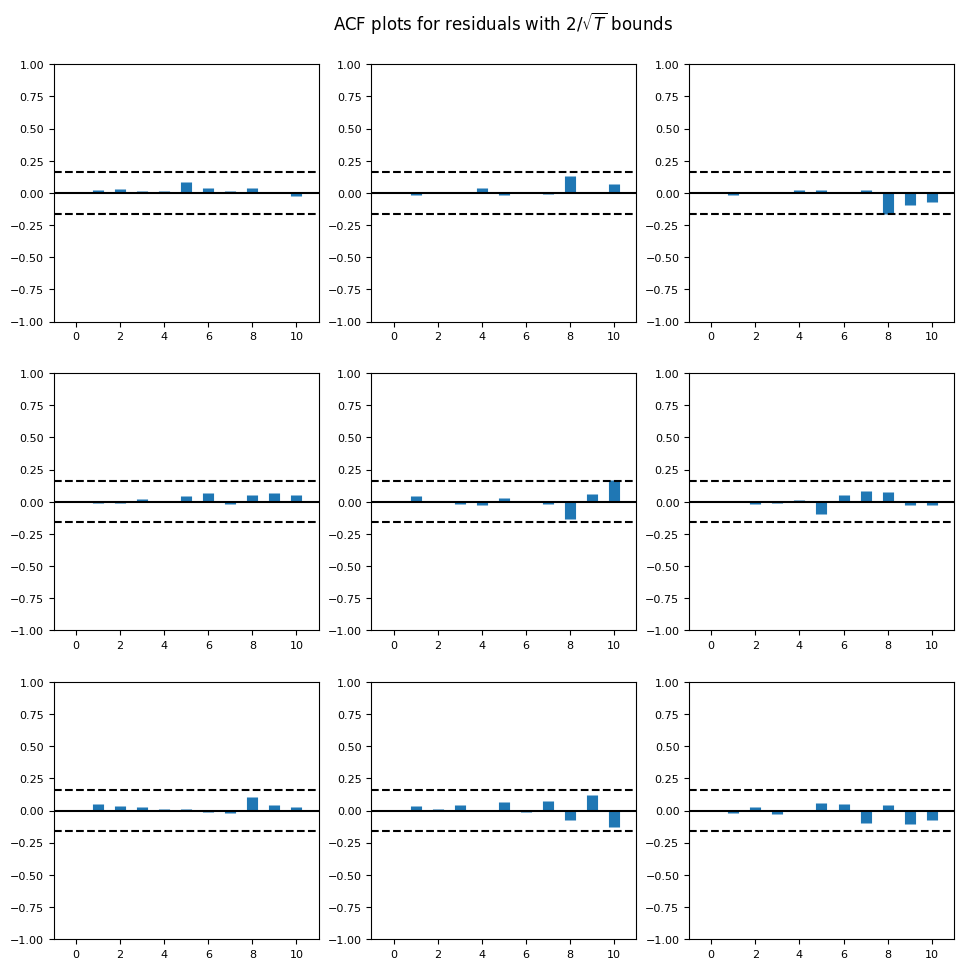

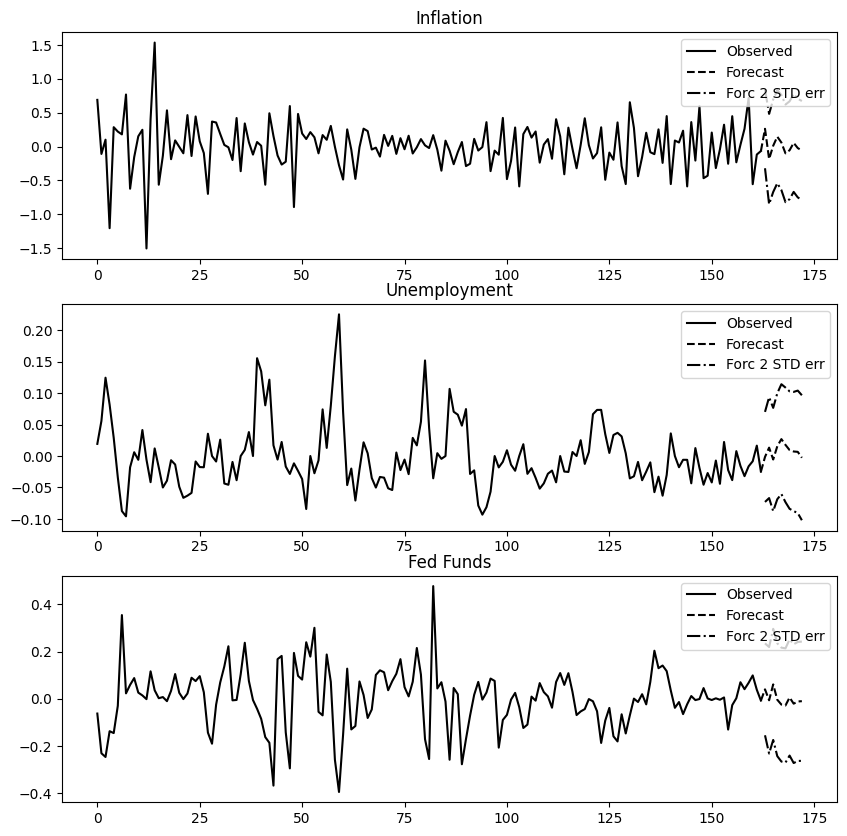

In [4]:
# VAR Model
data = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Four/data/SW2001_Data.xlsx', parse_dates=['obs'])
data.index = pd.DatetimeIndex(data['obs'])
#data.drop('date', inplace=True, axis=1)
data.head(), data.info()

fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(6,6))
fig.tight_layout(pad = 3.0)


#Plot Inflation against Time
data['Inflation'].plot(title = 'Inflation', ax = axes[0])

#Plot Unemployment against Time
data['Unemployment'].plot(title = 'Unemployment', ax = axes[1])

#Plot Federal Funds against Time
data['Fed Funds'].plot(title = 'Federal Funds', ax = axes[2])

data_use = data[['Inflation','Unemployment','Fed Funds']]
data_ret = np.log(data_use).diff().dropna()
# construct model
model = VAR(data_ret)
results = model.fit(8)
results.summary()
results.plot_acorr()
lag_order = results.k_ar
results.forecast(data_ret.values[-lag_order:],8)
results.plot_forecast(10)